In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('30_train_features.csv')

In [2]:
data = pd.read_csv('30_train_features.csv')

for i in data.index:
    if data['OS'].iloc[i] <= 300:
        data['OS'].iloc[i] = 0
#     elif data['OS'].iloc[i] <= 450 and data['OS'].iloc[i]>300:
#         data['OS'].iloc[i] = 1
#     else:
#         data['OS'].iloc[i] = 2
    else:
        data['OS'].iloc[i] = 1

/home/kapil/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
test_data = pd.read_csv('30_test_features.csv')
for i in test_data.index:
    if test_data['OS'].iloc[i] <= 300:
        test_data['OS'].iloc[i] = 0
#     elif test_data['OS'].iloc[i] <= 450 and test_data['OS'].iloc[i]>300:
#         test_data['OS'].iloc[i] = 1
#     else:
#         test_data['OS'].iloc[i] = 2
    else:
        test_data['OS'].iloc[i] = 1

/home/kapil/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
drop_col = data.columns[]
X_train = data.drop(['OS'],axis=1)
y_train = data['OS']

In [5]:
X_test = test_data.drop(['OS'],axis=1)
y_test = test_data['OS']

In [6]:
num_labels = 2
one_hot_test = (np.arange(num_labels) == np.array(y_test)[:,None]).astype(np.float32)

In [7]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/ predictions.shape[0])

In [8]:
num_labels = 2
one_hot_y = (np.arange(num_labels) == np.array(y_train)[:,None]).astype(np.float32)

In [9]:
X_train = X_train.as_matrix()

In [10]:
X_test = X_test.as_matrix()

In [11]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [40]:
feature_size = X_train.shape[1]
beta = 0.01

tf_train = tf.constant(X_train)
tf_label = tf.constant(one_hot_y)

tf_test = tf.constant(X_test)
tf_test_label = tf.constant(one_hot_test)

W = tf.Variable(tf.random_normal(shape=(feature_size,num_labels),dtype=tf.float64,seed=45))
b = tf.Variable(tf.zeros(shape=(num_labels),dtype=tf.float64))

z = tf.matmul(tf_train,W) + b
yhat = tf.nn.softmax(z)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=yhat,labels=tf_label))
regularizer = tf.nn.l2_loss(W)
loss = tf.reduce_mean(loss + beta*regularizer)

optimizer = tf.train.AdamOptimizer(0.1).minimize(loss)

test_pred = tf.nn.softmax(tf.matmul(tf_test,W) + b)
prediction = tf.nn.softmax(z)

In [41]:
epochs = 10000
costs = []
test_losses = []

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    
    for i in range(epochs):
        sess.run(optimizer)
        
        cost = sess.run(loss)
        costs.append(cost)
        
        pred = sess.run(prediction) 
        
        if (i%1000 == 0):
            print('Accuracy = ',accuracy(pred,one_hot_y))
    test_prediction = sess.run(test_pred)
    print('Test Accuracy = ', accuracy(test_prediction,one_hot_test))
         

Accuracy =  53.0612244898
Accuracy =  83.6734693878
Accuracy =  82.6530612245
Accuracy =  82.6530612245
Accuracy =  82.6530612245
Accuracy =  81.6326530612
Accuracy =  83.6734693878
Accuracy =  83.6734693878
Accuracy =  83.6734693878
Accuracy =  83.6734693878
Test Accuracy =  72.7272727273


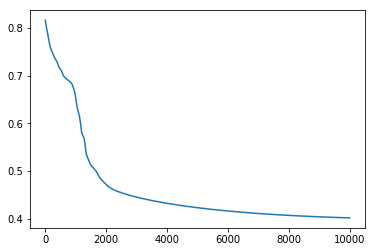

In [33]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show()

In [42]:
final_labels = np.argmax(test_prediction,1)

In [43]:
print(final_labels)
print(np.array((y_test)))

[0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(y_test)):
    if (y_test[i] == 1):
        if (final_labels[i] == 1):
            TP += 1
        else:
            FN += 1
    else:
        if (final_labels[i] == 1):
            FP += 1
        else:
            TN += 1
print(TP + TN + FP + FN)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
print('Sensitivity = ',sensitivity)
print('Specificity = ',specificity)

33
Sensitivity =  0.7894736842105263
Specificity =  0.6428571428571429


In [46]:
a = np.corrcoef(final_labels.astype(np.float32),y_test.astype(np.float32))


In [47]:
print(a)

[[ 1.          0.43729081]
 [ 0.43729081  1.        ]]


In [57]:
b = np.corrcoef(X_train[:,18],X_train[:,15])

In [59]:
print(b)

[[ 1.          0.65285495]
 [ 0.65285495  1.        ]]


# Correlation

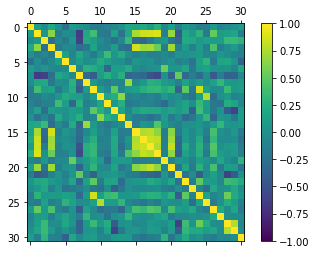

In [69]:
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
ticks = np.arange(0,32,1)
ax.set_xticks(ticks)

ax.set_yticks(ticks)
cax  = ax.matshow(correlations,vmin=-1.0,vmax=1.0)
fig = plt.colorbar(cax)
plt.show()
# plt.savefig('Corr.jpg')

In [74]:
correlations

,0_general_info_VolumeNum,0_general_info_VoxelNum,0_original_shape_Compactness2,0_original_shape_Maximum3DDiameter,4_original_firstorder_Minimum,Age,1_original_firstorder_Kurtosis,0_original_shape_SurfaceVolumeRatio,0_original_shape_Elongation,4_original_firstorder_MeanAbsoluteDeviation,...,4_original_shape_SurfaceVolumeRatio,0_original_firstorder_Maximum,2_original_firstorder_InterquartileRange,4_original_firstorder_90Percentile,2_original_firstorder_Minimum,1_general_info_VoxelNum,1_original_shape_Flatness,0_original_firstorder_90Percentile,0_original_firstorder_InterquartileRange,OS
0_general_info_VolumeNum,1.000000,0.119706,-0.026768,0.195826,0.031167,-0.271506,0.095902,0.038204,-0.011202,-0.152635,...,-0.157730,0.050067,-0.005589,-0.152280,-0.146017,0.089073,-0.113915,-0.056821,0.011701,0.099354
0_general_info_VoxelNum,0.119706,1.000000,0.046175,0.641830,-0.152068,-0.021941,-0.025524,-0.654112,0.175380,0.389613,...,-0.435585,0.194143,0.082410,0.296730,-0.168328,0.521418,0.096796,0.126360,0.183324,-0.136788
0_original_shape_Compactness2,-0.026768,0.046175,1.000000,-0.273802,-0.077878,-0.173065,0.045142,-0.607250,0.217068,0.113453,...,-0.346841,0.220220,0.193748,0.082077,0.142232,0.094034,0.113502,0.355994,0.350934,0.297903
0_original_shape_Maximum3DDiameter,0.195826,0.641830,-0.273802,1.000000,-0.164776,-0.045443,-0.049542,-0.267845,-0.190594,0.159061,...,-0.126083,0.086054,-0.121659,0.106003,-0.136043,0.427260,-0.140952,-0.023256,0.096614,-0.108131
4_original_firstorder_Minimum,0.031167,-0.152068,-0.077878,-0.164776,1.000000,0.136780,-0.085235,0.201343,0.004799,-0.166402,...,0.041869,0.024916,0.041936,0.087529,-0.070688,-0.084776,0.060420,-0.016137,-0.098809,-0.120314
Age,-0.271506,-0.021941,-0.173065,-0.045443,0.136780,1.000000,-0.050050,0.099662,-0.026433,0.034769,...,-0.131891,-0.066262,-0.241995,0.145825,0.297106,-0.180804,0.166696,0.192171,0.047952,-0.372343
1_original_firstorder_Kurtosis,0.095902,-0.025524,0.045142,-0.049542,-0.085235,-0.050050,1.000000,-0.063597,0.285495,0.237116,...,0.057055,0.183289,-0.168957,0.116357,0.149350,0.033363,0.022483,0.034547,-0.078652,0.189551
0_original_shape_SurfaceVolumeRatio,0.038204,-0.654112,-0.607250,-0.267845,0.201343,0.099662,-0.063597,1.000000,-0.301366,-0.395042,...,0.515850,-0.319267,-0.136046,-0.302491,-0.000373,-0.425731,-0.135192,-0.357410,-0.346004,-0.051582
0_original_shape_Elongation,-0.011202,0.175380,0.217068,-0.190594,0.004799,-0.026433,0.285495,-0.301366,1.000000,0.083207,...,-0.125274,0.143273,-0.008704,0.095883,-0.018871,0.146253,0.320980,0.086282,0.043295,0.088764
4_original_firstorder_MeanAbsoluteDeviation,-0.152635,0.389613,0.113453,0.159061,-0.166402,0.034769,0.237116,-0.395042,0.083207,1.000000,...,-0.365751,0.494965,-0.190845,0.857012,0.135927,-0.034109,-0.017524,0.355969,0.069500,0.123036
